In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#When you call seaborn.set(), you can specify various parameters to change the default appearance of your plots, 
sns.set()

In [25]:
dataFrame = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/Advertising.csv')

In [26]:
dataFrame.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
#drop the Unnamed column as it doesnt have name
dataFrame.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [28]:
dataFrame

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
#now lets describe the data and round it to decimal of 2
dataFrame.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


TV              AxesSubplot(0.125,0.11;0.168478x0.77)
Radio        AxesSubplot(0.327174,0.11;0.168478x0.77)
Newspaper    AxesSubplot(0.529348,0.11;0.168478x0.77)
Sales        AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

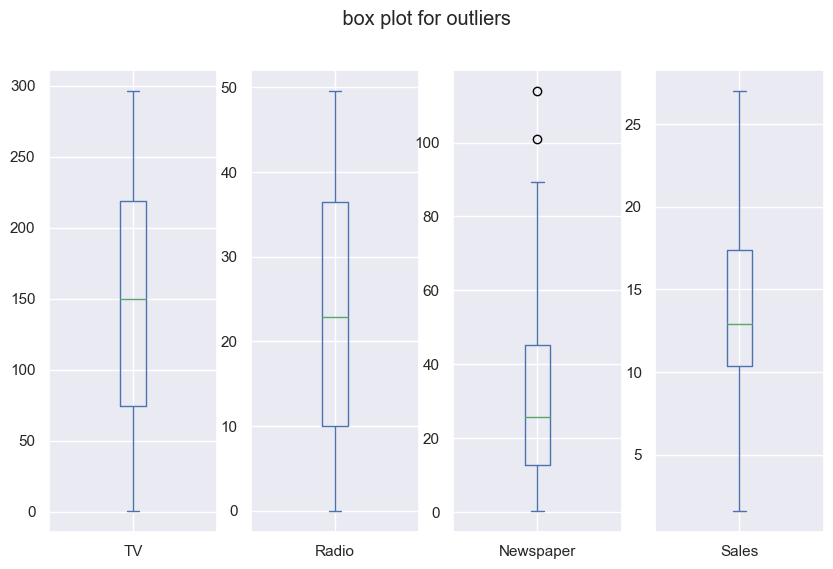

In [39]:
#draw the box plots using the pandas and check for the outliers
dataFrame.plot(kind='box',subplots = True, figsize =(10,6),title = " box plot for outliers")


In [40]:
'''
now we can see the newspaper there are outliers
these outliers are not good for the linear regression model
so we need to skew b-co-efficeint values, we can either drop them 
or cap them with some values

'''
q1,q3 = dataFrame['Newspaper'].quantile([0.25,0.75])
#IQR inter-quantile range
IQR = q3-q1
#upper limit for outliers
upperLimit = q3+1.5*IQR
lowerLimit = q1-1.5*IQR
#np.where(condition,x,y) --> if condition satisfied then x else y
#now will check for the lower outliers and replace them with lower level
dataFrame['Newspaper'] = np.where(dataFrame['Newspaper'] < lowerLimit,lowerLimit,dataFrame['Newspaper'])
#now will check for the upper outliers and replace them with upper level
dataFrame['Newspaper'] = np.where(dataFrame['Newspaper'] > upperLimit,upperLimit,dataFrame['Newspaper'])



TV              AxesSubplot(0.125,0.11;0.168478x0.77)
Radio        AxesSubplot(0.327174,0.11;0.168478x0.77)
Newspaper    AxesSubplot(0.529348,0.11;0.168478x0.77)
Sales        AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

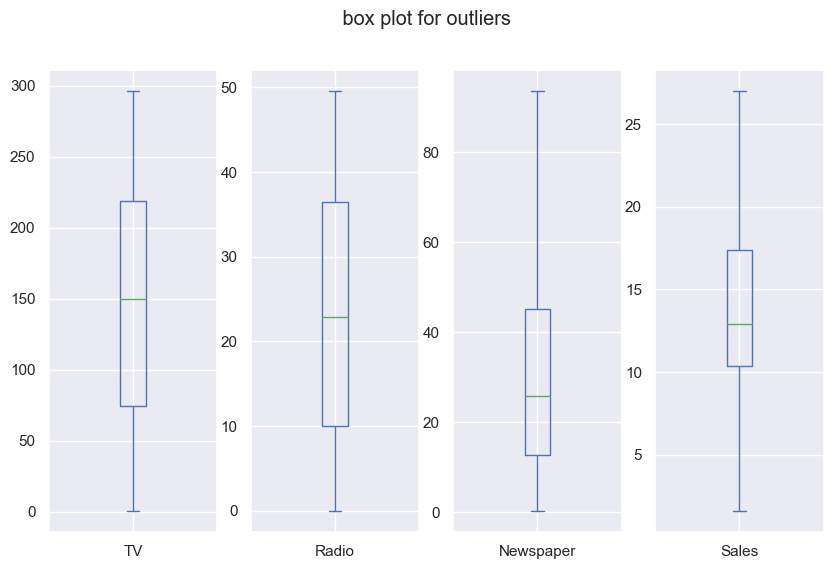

In [41]:
#now check for the outliers again
dataFrame.plot(kind='box',subplots = True, figsize =(10,6),title = " box plot for outliers")
#after drawing this we can see there are no outliers now

In [44]:
'''
now lets divide the data into features and target
'''
features = dataFrame.drop(columns=['Sales'],axis=1)
target = dataFrame.drop(columns=['TV','Radio','Newspaper'],axis=1)

In [45]:
'''
now lets split the data into train and test using sklearn.model_selection
test_size = 0.3 --> 30% so the train size will be 0.7 --> 70%
random_state --> will ensures when we run the code each observation go into same test and train in simple words
repetability
'''
from sklearn.model_selection import train_test_split

feature_train,feature_test, target_train, target_test = train_test_split(features,target,test_size=0.3,random_state=1)

In [51]:
'''
now lets train the linear regression model
'''
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(feature_train,target_train)
target_test_predicted = lin_reg.predict(feature_test)
target_train_predicted = lin_reg.predict(feature_train)

In [52]:
'''Xnow lets see the co-efficients of the model
the coef_ is the attribute wich will have the b-co-effiecnet of the features
'''
lin_reg.coef_

array([[0.04695438, 0.17661103, 0.00181698]])

In [53]:
'''
intercept_ will give the intercept of the equation
'''
lin_reg.intercept_

array([2.93743232])

In [ ]:
'''
now the linearregression equation can be written as 
sales = 2.93 + 0.05 * TV + 0.18 *  Radio + 0.002 * Newspaper 
--> so the news paper has not significant impact
'''

In [55]:
'''
Now lets evaluate the model using RMSE --> root mean squared error and r^2 error  
'''
from sklearn.metrics import r2_score, mean_squared_error

rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_train,rmse_test

(1.7897445239312517, 1.3886376752307525)

In [56]:
#now calculate the r^2 error
'''
in standard practice the train and test r2-score should be + or - 5%
overfitting --> assume if the test r2_core is below 10% of the train then that model is overfitted model.
underfitting --> assume if the train r2_score is below 10% of the test then that model is underfitted model.
'''
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_train,r2_test

(0.8850029368457597, 0.9224851041983292)

In [65]:
#residual of the model
#calculate the residual of the predictions
residuals = target_test - target_test_predicted 
residuals


,Sales
58,2.136176
40,0.158462
34,1.808332
102,-3.116706
184,-1.070779
198,1.708357
95,0.617890
4,-0.540296
29,1.347679
168,-0.224085
